# MultiLayer Perceptron - Deep Neural Network

In [5]:
# !pip install tensorflow

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

print(tf.__version__)

2.10.0


# Fashion MNIST dataset, an alternative to MNIST

In [7]:
# Load the data from Keras 

fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data() 

In [8]:
# Chech the shape of the dataset
print(train_images.shape, train_labels.shape, test_images.shape, test_labels.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [9]:
# Label	Description
# 0	T-shirt/top
# 1	Trouser
# 2	Pullover
# 3	Dress
# 4	Coat
# 5	Sandal
# 6	Shirt
# 7	Sneaker
# 8	Bag
# 9	Ankle boot

In [10]:
class_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt', 'Sneaker','Bag','Ankle boot']

In [11]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

# See the images in the dataset by plotting them

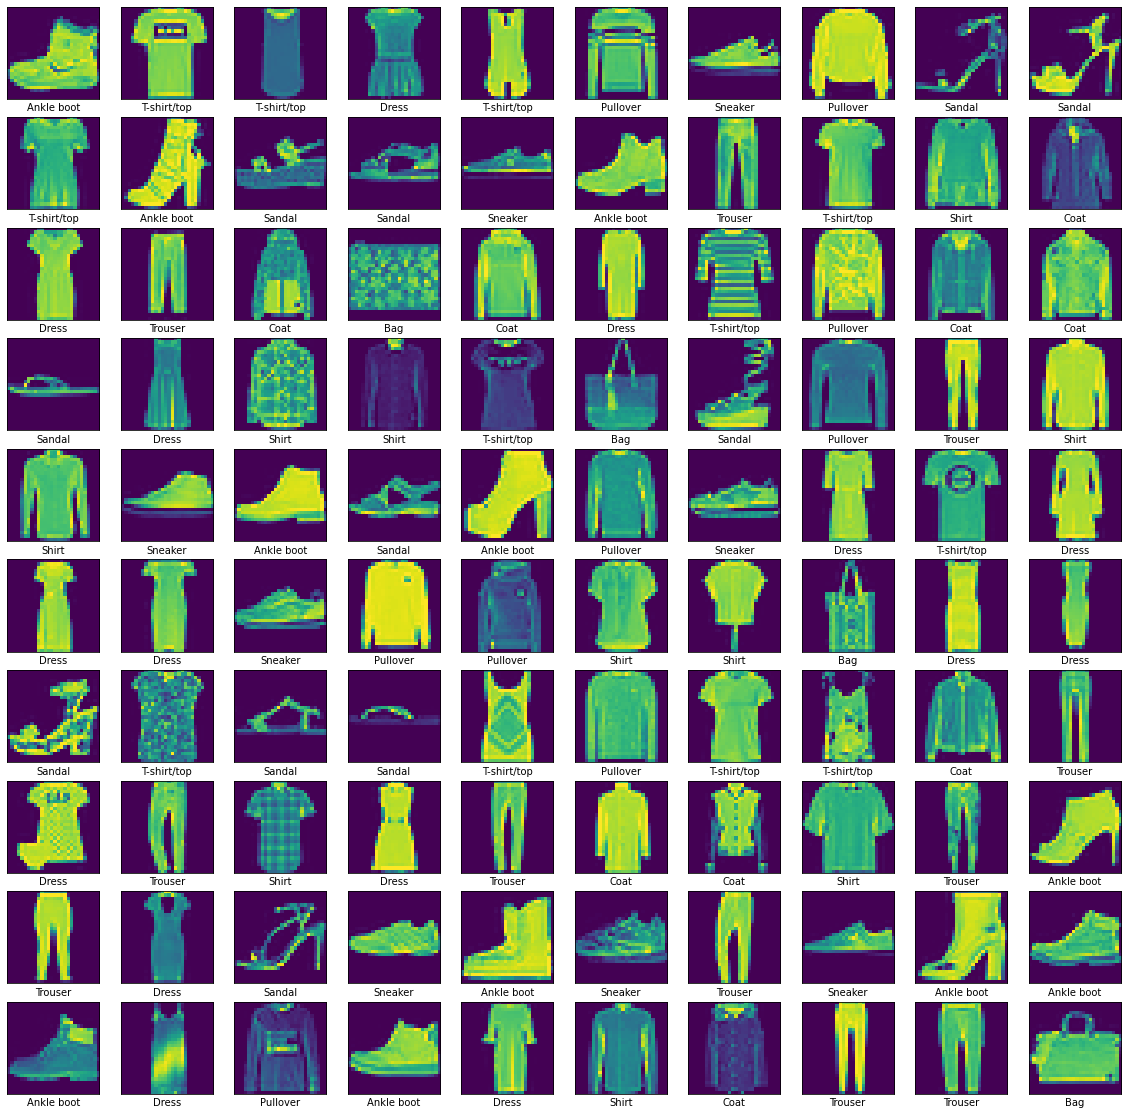

In [38]:
plt.figure(figsize=(20,20))
for i in range(100):
    plt.subplot(10,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i]])
plt.show()

# Mandatory Steps - Scale the image first (Min_Max Approach)

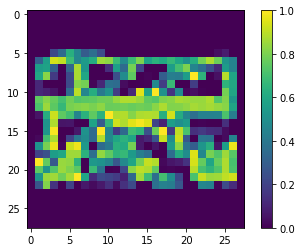

In [15]:
# pre-process steps - min-max scaling (0 to 1)
train_images = train_images/255.0   # Since max value of a pixel is 255
test_images = test_images/255.0

plt.figure()
plt.imshow(train_images[10000])
plt.colorbar()
plt.grid(False)
plt.show()

# Colorbar range reduces from 0-255 to 0-1

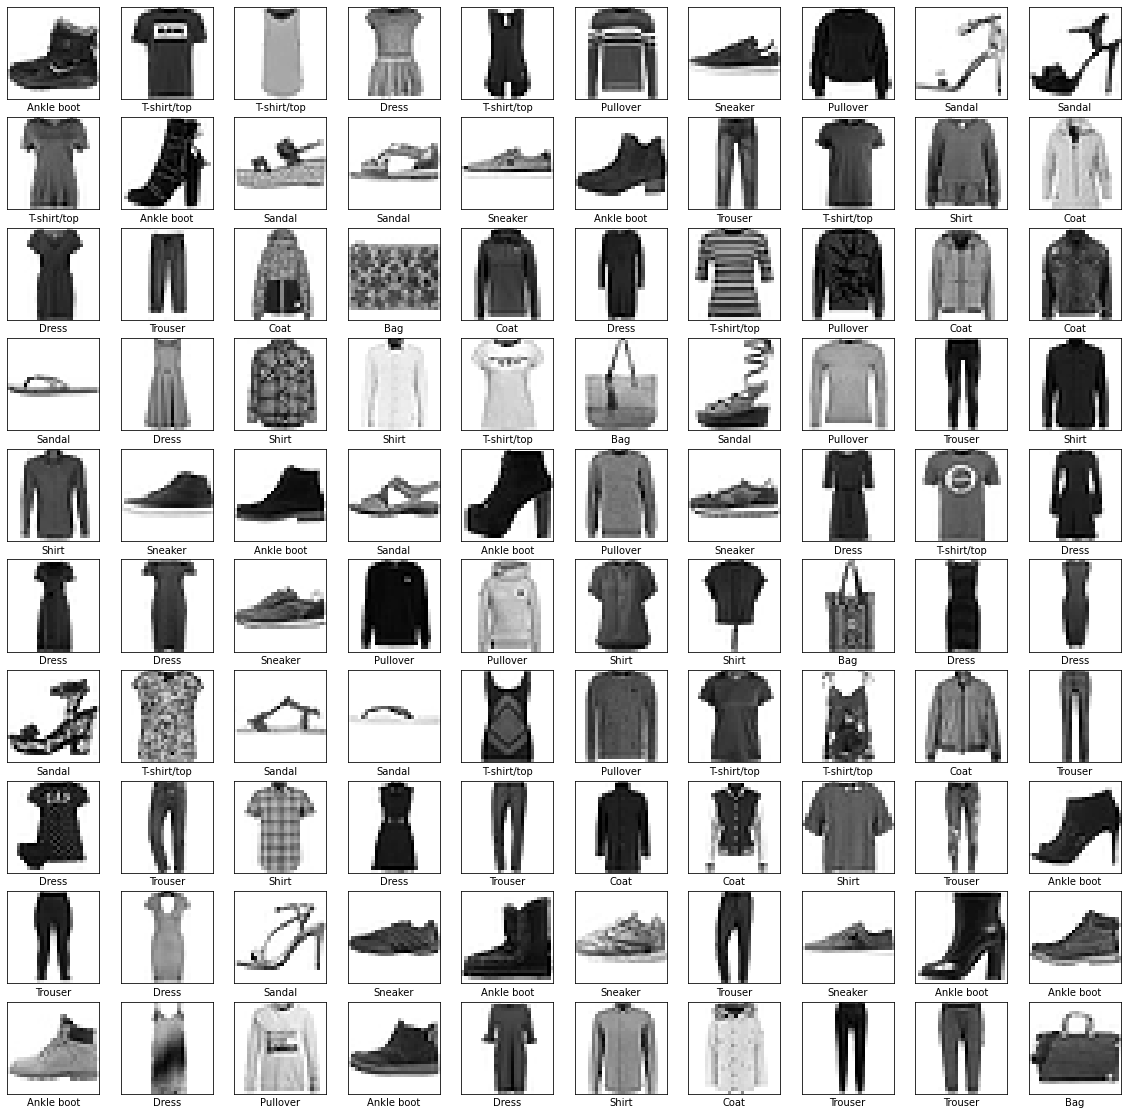

In [40]:
plt.figure(figsize=(20,20))
for i in range(100):
  plt.subplot(10,10,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])

plt.show()

# MLP - Multi Layer Perceptron Model - Sequential

In [41]:
tf.random.set_seed(100)
tf.keras.backend.clear_session()

model = None
model = keras.Sequential([
   keras.layers.Flatten(input_shape=(28,28)), 
   keras.layers.Dense(128, activation = 'relu'),
   keras.layers.Dense(10)                             # Number of classes to classify. Should be less than first hidden layer
])


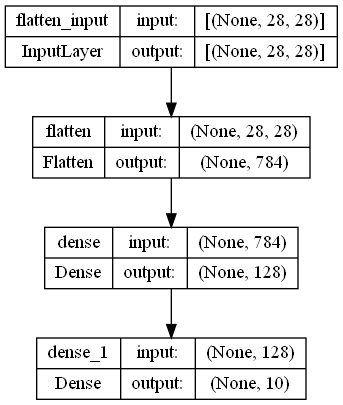

In [42]:
from tensorflow.keras.utils import plot_model
plot_model(model, 'model.png',show_shapes=True)

In [43]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [44]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics = ['accuracy'])

In [46]:
# epoch = 1 Back Propagation & 1 Forward Propagation
model.fit(train_images, train_labels, epochs=10, use_multiprocessing=True)    

Epoch 1/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2277 - accuracy: 0.9146
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2196 - accuracy: 0.9168
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2133 - accuracy: 0.9200
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2062 - accuracy: 0.9226
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2014 - accuracy: 0.9240
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1976 - accuracy: 0.9258
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1901 - accuracy: 0.9283
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1842 - accuracy: 0.9301
Epoch 9/10
1875/1875 [==============================] - 2s 997us/step - loss: 0.1801 - accuracy: 0.9327
Epoch 10/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1

In [47]:
model.fit(train_images, train_labels, epochs=50, use_multiprocessing=True)
# Accuracy actually starts from where we left off in the previous iteration.

Epoch 1/50
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1711 - accuracy: 0.9356
Epoch 2/50
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1667 - accuracy: 0.9370
Epoch 3/50
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1622 - accuracy: 0.9384
Epoch 4/50
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1579 - accuracy: 0.9406
Epoch 5/50
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1559 - accuracy: 0.9406
Epoch 6/50
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1532 - accuracy: 0.9424
Epoch 7/50
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1494 - accuracy: 0.9437
Epoch 8/50
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1458 - accuracy: 0.9443
Epoch 9/50
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1406 - accuracy: 0.9471
Epoch 10/50
1875/1875 [==============================] - 2s 1ms/step - loss: 0.139

In [49]:
model.fit(train_images, train_labels, epochs=10, validation_data = (test_images, test_labels), use_multiprocessing=True)


Epoch 1/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0583 - accuracy: 0.9778 - val_loss: 0.7019 - val_accuracy: 0.8852
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0569 - accuracy: 0.9789 - val_loss: 0.7550 - val_accuracy: 0.8840
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0566 - accuracy: 0.9790 - val_loss: 0.7373 - val_accuracy: 0.8822
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0553 - accuracy: 0.9800 - val_loss: 0.7507 - val_accuracy: 0.8831
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0528 - accuracy: 0.9801 - val_loss: 0.7587 - val_accuracy: 0.8884
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0539 - accuracy: 0.9801 - val_loss: 0.7195 - val_accuracy: 0.8877
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0546 - accuracy: 0.9798 - val_loss: 0.7501 - val_accuracy: